In [1]:
# 모델 불러오기
from transformers import ViTForImageClassification, ViTImageProcessorFast
from transformers import pipeline
from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image
import io
import matplotlib.pyplot as plt

# clf = ViTImageProcessorFast.from_pretrained('google/vit-base-patch16-224', use_fast=True)

clf = pipeline(task='image-classification', model='google/vit-base-patch16-224',use_fast=True)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [2]:
# animal = clf('https://upload.wikimedia.org/wikipedia/commons/d/de/Nokota_Horses_cropped.jpg')

In [3]:
# animal

In [4]:
img = ''

In [5]:
def upload_button():
    global img
    img = FileUpload(multile=False)
    display(img)

In [6]:
def img_trans(img):
    img_bytes = io.BytesIO(img.value['output.png']['content'])
    input_img = Image.open(img_bytes)
    return input_img

In [7]:
def imshow(input_img):
    plt.subplots(figsize=(3,3))
    plt.imshow(input_img)
    plt.axis('off')
    plt.title('input image')
    plt.show()

In [16]:
def classification(input_img,clf=clf):
    # 가장 점수가 높은 대상의 label 알아보기
    animal = clf(input_img)
    animal = animal[0]['label']

    # 동물에 따른 반응 구현하기
    if 'cat' in animal.lower():
        print('야생의 고양이가 애옹 하고 울부짖었다!')
    elif 'corgi' in animal.lower():
        print('멍멍으르렁왈왈!')
    else:
        print(f'입력된 사진에는 {animal}이(가) 있는 모양이네요!')

In [9]:
upload_button()

FileUpload(value={}, description='Upload')

In [11]:
input_img = img_trans(img)

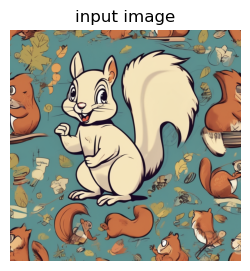

In [12]:
imshow(input_img)

In [17]:
classification(input_img)

입력된 사진에는 comic book이(가) 있는 모양이네요!
